# Is there a relation between the sSFR and the presence of an AGN in a galaxy? If that is the case, what are the physical reasons?

### Main Sequence of Star Forming galaxies

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy
from astropy.table import Table
#!pip install pandas
import pandas
import matplotlib

Read the fits file and extract the stellar mass and the SFR

In [2]:
data=Table.read('SDSS_LAB2024_CIGALEresults.fits', format = 'fits')
data=data.to_pandas()
mass=np.array(data.loc[:,"best_stellar_m_star"])
sfr=np.array(data.loc[:,"best_sfh_sfr"])
age=np.array(data.loc[:,"best_sfh_age"])
tau=np.array(data.loc[:,"best_sfh_tau_main"])

Compute the log of the data

In [3]:
MASS = np.log10(mass)
SFR = np.log10(sfr)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_14781/2456209094.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')


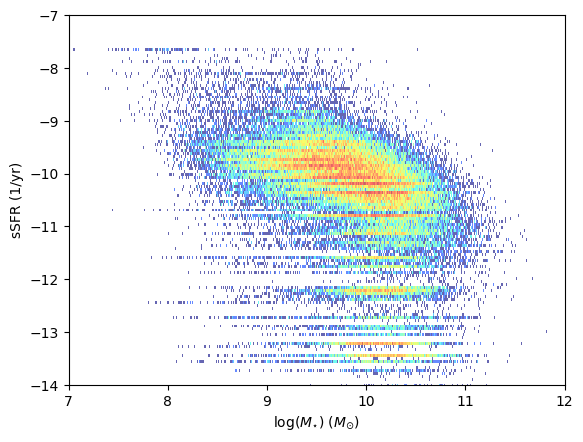

In [4]:
sSFR = SFR - MASS

plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

Now, we cut the data to isolate the main sequence

In [5]:
# Cut the data
thr = -10.6
mask = sSFR > thr
MASS_filtered = MASS[mask]
sSFR_filtered = sSFR[mask]

print("Vettore x filtrato:", MASS_filtered)
print("Vettore y filtrato:", sSFR_filtered)

Vettore x filtrato: [ 9.29994445 10.28013151  9.42962306 ...  9.07951597 10.58629297
  9.5275906 ]
Vettore y filtrato: [ -9.68092327 -10.17831724  -9.61341332 ... -10.20561406 -10.26293619
  -9.92313042]


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_14781/110451825.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')


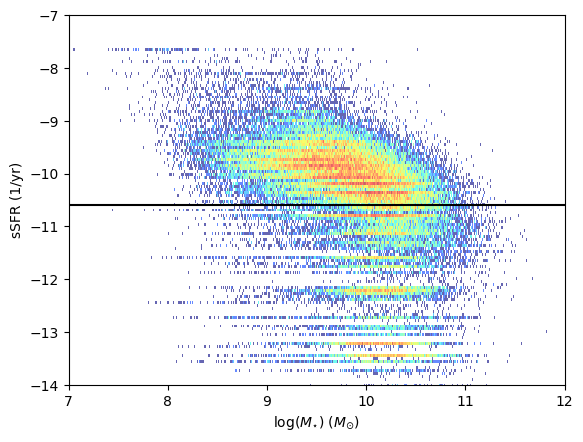

In [6]:
plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')

plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_14781/587629798.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')


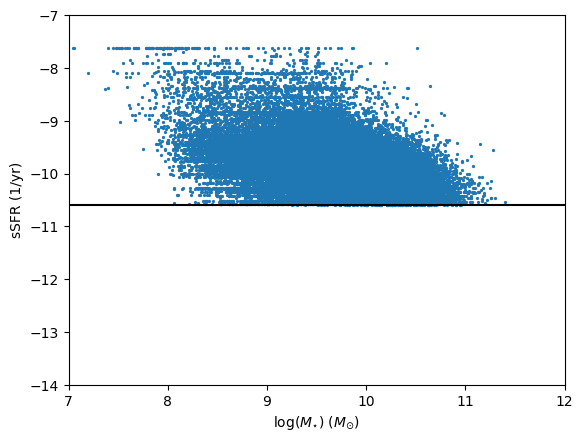

In [7]:
plt.scatter(MASS_filtered, sSFR_filtered, marker='.', s=7, alpha=1)
#plt.plot(MASS, np.polyval(par_new, MASS), color='red')

plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')

plt.show()

#### Find the galaxies with AGN

In [8]:
spec=Table.read('SDSS_LAB2024_spectroscopy.fits', format = 'fits')
spec=spec.to_pandas()
metallicity=np.array(spec.loc[:,"log_oh"])

In [9]:
oiii = np.array(spec.loc[:,'oiii_5007_flux'])
oiii_err = np.array(spec.loc[:, 'oiii_5007_flux_err'])
nii = np.array(spec.loc[:,'nii_6584_flux'])
nii_err = np.array(spec.loc[:, 'nii_6584_flux_err'])
halpha = np.array(spec.loc[:,'h_alpha_flux'])
halpha_err = np.array(spec.loc[:,'h_alpha_flux_err'])
hbeta = np.array(spec.loc[:,'h_beta_flux'])
hbeta_err = np.array(spec.loc[:, 'h_beta_flux_err'])

We plot the ratios between emission line fluxes

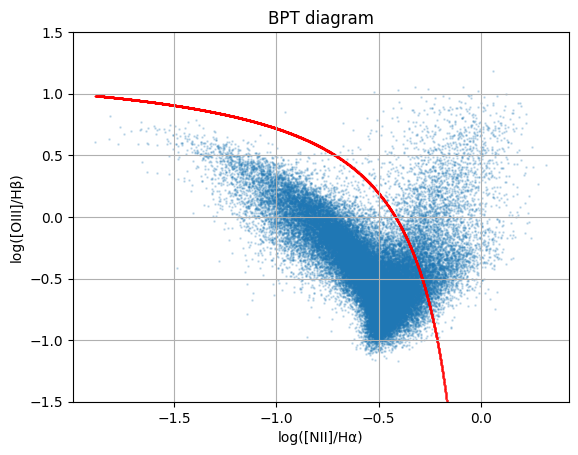

In [10]:
mask_lines = (oiii/oiii_err > 5) & (nii/nii_err > 5) & (halpha/halpha_err > 5) & (hbeta/hbeta_err > 5)
oiii_lines = oiii[mask_lines]
nii_lines = nii[mask_lines]
halpha_lines = halpha[mask_lines]
hbeta_lines = hbeta[mask_lines]
mass_lines = mass[mask_lines]
MASS_lines = MASS[mask_lines]
sSFR_lines = sSFR[mask_lines]

y = np.log10(oiii_lines/hbeta_lines)
x = np.log10(nii_lines/halpha_lines)

def agn (x):
    return 0.61/(x-0.05) + 1.3

x_grid = np.linspace(np.min(x), np.max(x), 10000)
plt.scatter(x, y, marker = '.', s = 3, alpha=0.2)
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.ylim(-1.5,1.5)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.grid()
plt.show()

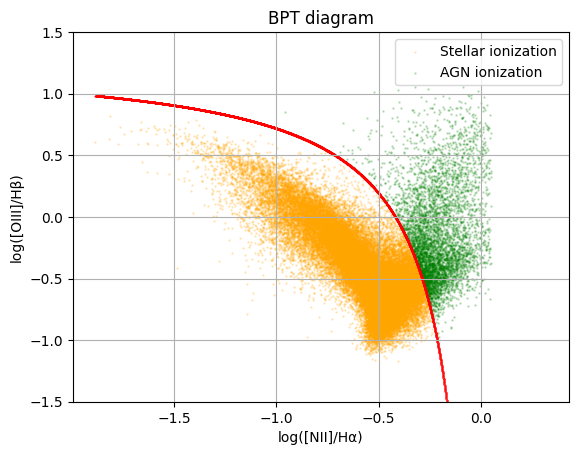

In [11]:
mask_agn = (y > agn(x)) 
y_new = y[mask_agn]
x_new = x[mask_agn]
mass_new = mass_lines[mask_agn]

mask_stellar = (y < agn(x)) & (x < 0)
y_s = y[mask_stellar]
x_s = x[mask_stellar]
mass_s = mass_lines[mask_stellar]

plt.scatter(x_s, y_s, marker = '.', s = 3, color = 'orange', alpha=0.2, label='Stellar ionization')
plt.scatter(x_new, y_new, marker = '.', s = 3,color = 'g', alpha=0.2, label='AGN ionization')
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.legend()

plt.ylim(-1.5,1.5)
plt.grid()
plt.show()

Galaxies in which gas is ionized by the presence of an AGN are green dots.

Galaxies in which gas is ionized by groups of young stars are orange dots.

In [12]:
sSFR_agn = sSFR_lines[mask_agn]
sSFR_s = sSFR_lines[mask_stellar]
MASS_agn = MASS_lines[mask_agn]
MASS_s = MASS_lines[mask_stellar]

In blu the galaxies with AGN. We see that they have a mass bigger than 9.8 solar masses

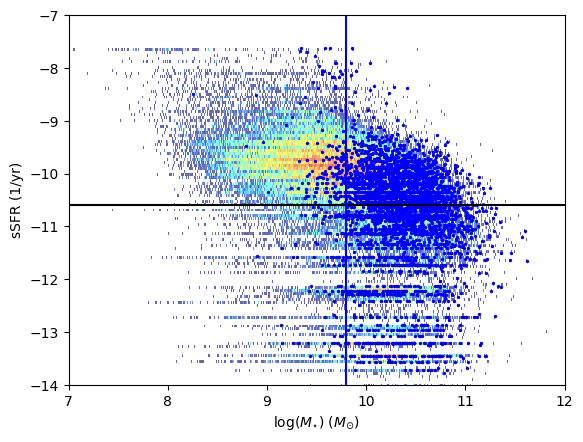

In [13]:
plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
#plt.scatter(MASS_s, sSFR_s, color = 'pink', label='stellar', s = 2, alpha = 0.5)
plt.scatter(MASS_agn, sSFR_agn, color = 'blue', label='AGN', s = 2)

thr_agn = 9.8

plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')
plt.axvline(thr_agn, color = 'b')

#plt.legend()
plt.show()

#### Now, we select only the galaxies with mass bigger than thr_agn

In [14]:
mask_th_agn = MASS_agn > thr_agn
MASS_agn_th = MASS_agn[mask_th_agn]
sSFR_agn_th = sSFR_agn[mask_th_agn]

mask_th_s = MASS_s > thr_agn
MASS_s_th = MASS_s[mask_th_s]
sSFR_s_th = sSFR_s[mask_th_s]

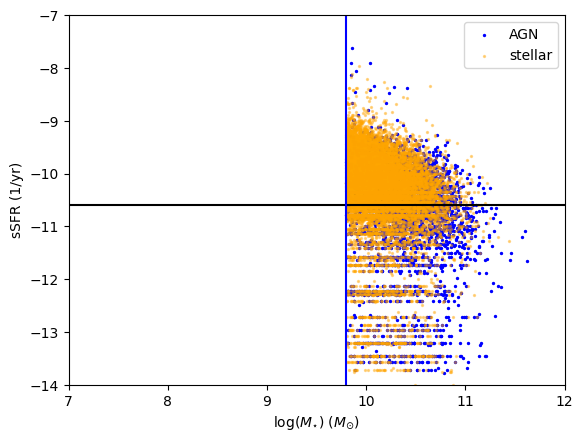

In [15]:
plt.scatter(MASS_agn_th, sSFR_agn_th, color = 'blue', label='AGN', s = 2)
plt.scatter(MASS_s_th, sSFR_s_th, color = 'orange', label='stellar', s = 2, alpha=0.4)

plt.axhline(thr, color = 'k')
plt.axvline(thr_agn, color = 'b')

plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.legend()
plt.show()

### Binning

We have already selected galaxies with AGN (from spectra lines)

We scatter plot these galaxies on the sSFR-M plot and we observe that galaxies with AGN have masses bigger
than 10^9.8 solar masses

We selected all galaxies with mass higher than 10^9.8

→ Binning of this mass interval

→ In each bin we compute the mean sSFR for AGN galaxies 

→ In each bin we compute the mean sSFR for NO AGN galaxies

→ Plot mean value of the mass in each bin with the matching values of mean sSFR

#### Divide the mass in bins and create hist of sSFR

In [16]:
# Definisci i bin per l'asse x
num_bins = 25
bins = np.linspace(min(MASS_agn_th), max(MASS_agn_th), num_bins + 1)
MASS_mean = (bins[0:-1]+bins[1:])/2

# Calcola la media delle y per ogni bin
bin_indices_agn = np.digitize(MASS_agn_th, bins) - 1  # trova l'indice del bin per ogni x
bin_indices_s = np.digitize(MASS_s_th, bins) - 1  # trova l'indice del bin per ogni x

bin_means_agn = np.zeros(num_bins)
bin_means_s = np.zeros(num_bins)

for i in range(num_bins):
    bin_y_agn = sSFR_agn_th[bin_indices_agn == i]
    bin_y_s = sSFR_s_th[bin_indices_s == i]
    
    if len(bin_y_agn) > 0:
        bin_means_agn[i] = np.mean(bin_y_agn)
        if (i == 19):
            print(bin_y_agn)
    else:
        bin_means_agn[i] = np.nan  # oppure 0 o un altro valore se preferisci

    if len(bin_y_s) > 0:
        bin_means_s[i] = np.mean(bin_y_s)
    else:
        bin_means_s[i] = np.nan  # oppure 0 o un altro valore se preferisci


[-232.92542946  -11.8860667   -10.70710475  -12.21705986  -10.26305958
  -26.34660089 -111.34342772  -10.93288907  -11.62130699  -11.19176985
 -198.18667885  -14.93215891  -24.10892389  -10.65578287  -40.81371361
  -11.37314505  -15.6648576  -163.44842487 -163.44842487  -13.45119076
  -30.29052281  -17.61667875  -79.95832207  -39.07782343  -11.1658595
  -18.08735374  -25.10501378]


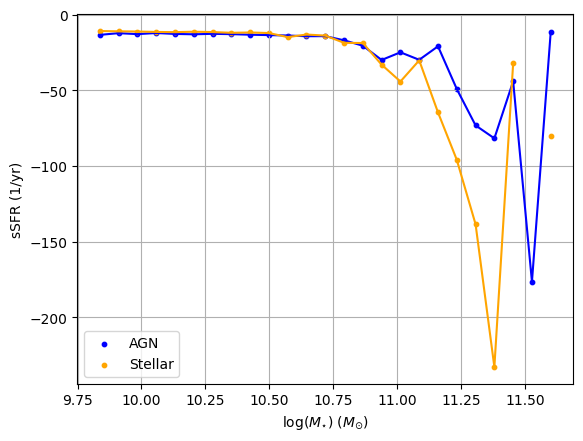

In [17]:
plt.plot(MASS_mean, bin_means_agn, color='blue')
plt.scatter(MASS_mean, bin_means_agn, color='blue', label='AGN', s=10)

plt.plot(MASS_mean, bin_means_s, color='orange')
plt.scatter(MASS_mean, bin_means_s, color='orange', label='Stellar', s=10)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Observations: 

1.        We have some points at very low sSFR (-200) *
2.        We computed the mean of the log(sSFR)

*When computing the things from spectra: we have some issues with the width of the lines and also we know SFR goes with e^(-t/T) therefore when the age of the galaxy is much bigger than the tau parameter, galaxies end up having those very low values of sSFR.

#### Zoom

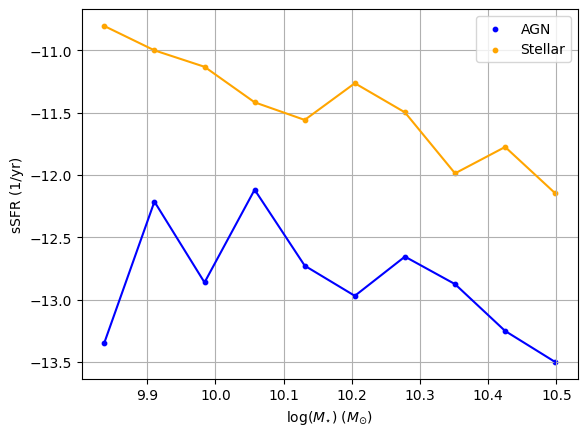

In [18]:
plt.plot(MASS_mean[0:10], bin_means_agn[0:10], color='blue')
plt.scatter(MASS_mean[0:10], bin_means_agn[0:10], color='blue', label='AGN', s=10)

plt.plot(MASS_mean[0:10], bin_means_s[0:10], color='orange')
plt.scatter(MASS_mean[0:10], bin_means_s[0:10], color='orange', label='Stellar', s=10)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Problems with outliers:

Galaxies with very low sSFR: we can’t completely remove them, that would be a mistake. BUT:

2 options:
- We put sSFR to -15 for every galaxy below -15
- We compute the median instead of mean

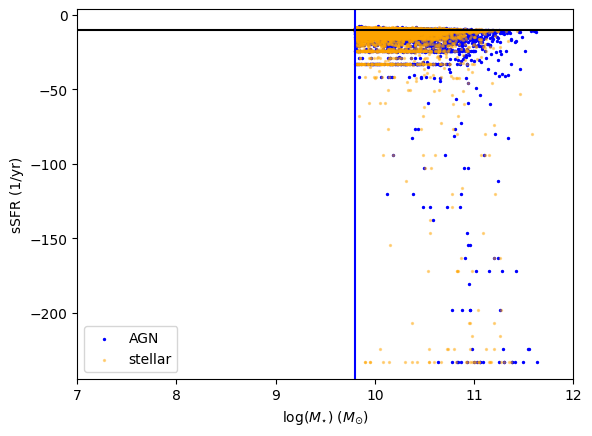

In [19]:
plt.scatter(MASS_agn_th, sSFR_agn_th, color = 'blue', label='AGN', s = 2)
plt.scatter(MASS_s_th, sSFR_s_th, color = 'orange', label='stellar', s = 2, alpha=0.4)

plt.axhline(thr, color = 'k')
plt.axvline(thr_agn, color = 'b')

#plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.legend()
plt.show()

## Median 

In [20]:
# Definisci i bin per l'asse x
num_bins = 15
bins = np.linspace(min(MASS_agn_th), max(MASS_agn_th), num_bins + 1)
MASS_mean = (bins[0:-1]+bins[1:])/2

# Calcola la media delle y per ogni bin
bin_indices_agn = np.digitize(MASS_agn_th, bins) - 1  # trova l'indice del bin per ogni x
bin_indices_s = np.digitize(MASS_s_th, bins) - 1  # trova l'indice del bin per ogni x

bin_median_agn = np.zeros(num_bins)
bin_median_s = np.zeros(num_bins)

for i in range(num_bins):
    bin_y_agn = sSFR_agn_th[bin_indices_agn == i]
    bin_y_agn = np.sort(bin_y_agn)
    bin_y_s = sSFR_s_th[bin_indices_s == i]
    bin_y_s = np.sort(bin_y_s)
    
    if len(bin_y_agn) > 0:
        bin_median_agn[i] = np.median(bin_y_agn)
    else:
        bin_median_agn[i] = np.nan  # oppure 0 o un altro valore se preferisci

    if len(bin_y_s) > 0:
        bin_median_s[i] = np.median(bin_y_s)
        if (i == 4):
            print(bin_y_s)
    else:
        bin_median_s[i] = np.nan  # oppure 0 o un altro valore se preferisci


[-232.92542946 -232.92542946 -206.87163826 ...   -9.02530299   -8.68367317
   -8.55056595]


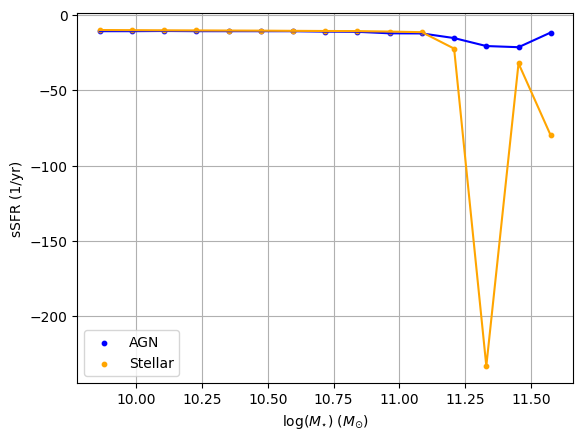

In [21]:
plt.plot(MASS_mean, bin_median_agn, color='blue')
plt.scatter(MASS_mean, bin_median_agn, color='blue', label='AGN', s=10)

plt.plot(MASS_mean, bin_median_s, color='orange')
plt.scatter(MASS_mean, bin_median_s, color='orange', label='Stellar', s=10)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Observations: 

for the AGN it solves the problem, but for stellar galaxies there are not enough galaxies => outliers make the median go low

Even changing the number of bins: still a problem

#### Zoom

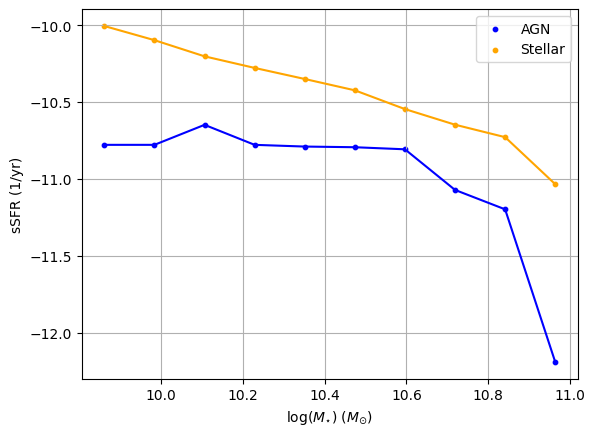

In [22]:
plt.plot(MASS_mean[0:10], bin_median_agn[0:10], color='blue')
plt.scatter(MASS_mean[0:10], bin_median_agn[0:10], color='blue', label='AGN', s=10)

plt.plot(MASS_mean[0:10], bin_median_s[0:10], color='orange')
plt.scatter(MASS_mean[0:10], bin_median_s[0:10], color='orange', label='Stellar', s=10)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

-> We have to use the first option: all values of sSFR lower than e^(-15) are chosen to be equal to e^(-15)
 
We could maybe compute the log of the mean (therefore we should first remove the log, then compute the mean sSFR, then compute again the log of the mean)

## Lower limit

MEAN

we compute the mean value of sSFR in each bin and its standard deviation, after changing all values of sSFR below e^(-15)

In [23]:
# Definisci i bin per l'asse x
num_bins = 15
bins = np.linspace(min(MASS_agn_th), max(MASS_agn_th), num_bins + 1)
MASS_mean = (bins[0:-1]+bins[1:])/2

# Calcola la media delle y per ogni bin
bin_indices_agn = np.digitize(MASS_agn_th, bins) - 1  # trova l'indice del bin per ogni x
bin_indices_s = np.digitize(MASS_s_th, bins) - 1  # trova l'indice del bin per ogni x

bin_means_agn = np.zeros(num_bins)
bin_means_s = np.zeros(num_bins)

sSFR_agn_th = np.maximum(sSFR_agn_th, -15)
sSFR_s_th = np.maximum(sSFR_s_th, -15)

stdmean_agn = np.zeros(num_bins)
stdmean_s = np.zeros(num_bins)

for i in range(num_bins):
    bin_y_agn = sSFR_agn_th[bin_indices_agn == i]
    bin_y_s = sSFR_s_th[bin_indices_s == i]

    stdmean_agn[i] = np.std(bin_y_agn)/np.sqrt(len(bin_y_agn))
    stdmean_s[i] = np.std(bin_y_s)/np.sqrt(len(bin_y_s))
    
    if len(bin_y_agn) > 0:
        bin_means_agn[i] = np.mean(bin_y_agn)
        if (i == 19):
            print(bin_y_agn)
    else:
        bin_means_agn[i] = np.nan  # oppure 0 o un altro valore se preferisci

    if len(bin_y_s) > 0:
        bin_means_s[i] = np.mean(bin_y_s)
    else:
        bin_means_s[i] = np.nan  # oppure 0 o un altro valore se preferisci

[0.02510396 0.02619411 0.02883996 0.03244528 0.03735207 0.04616592
 0.06107758 0.08012676 0.1268556  0.19409528 0.27795533 0.39928316
 0.50367657 1.31556657 0.        ]


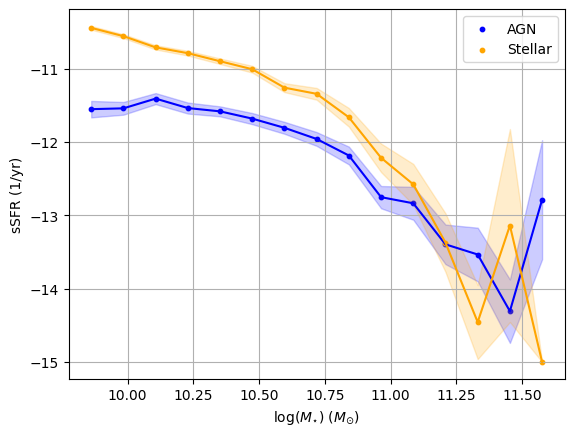

In [24]:
plt.plot(MASS_mean, bin_means_agn, color='blue')
plt.scatter(MASS_mean, bin_means_agn, color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean, bin_means_agn-stdmean_agn, bin_means_agn+stdmean_agn, color='blue', alpha=0.2)

plt.plot(MASS_mean, bin_means_s, color='orange')
plt.scatter(MASS_mean, bin_means_s, color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean, bin_means_s-stdmean_s, bin_means_s+stdmean_s, color='orange', alpha=0.2)

print(stdmean_s)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

[0.02510396 0.02619411 0.02883996 0.03244528 0.03735207 0.04616592
 0.06107758 0.08012676 0.1268556  0.19409528 0.27795533 0.39928316
 0.50367657 1.31556657 0.        ]


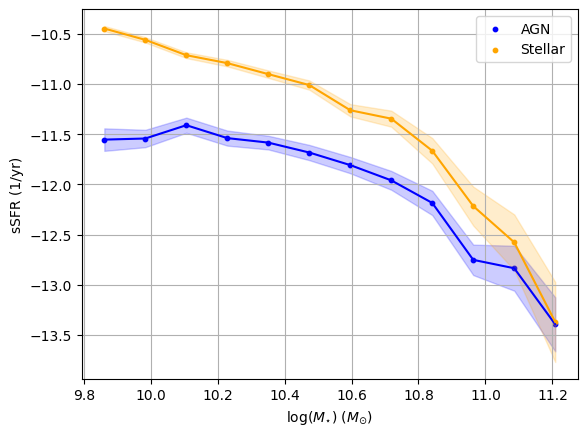

In [25]:
plt.plot(MASS_mean[0:12], bin_means_agn[0:12], color='blue')
plt.scatter(MASS_mean[0:12], bin_means_agn[0:12], color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_agn[0:12]-stdmean_agn[0:12], bin_means_agn[0:12]+stdmean_agn[0:12], color='blue', alpha=0.2)

plt.plot(MASS_mean[0:12], bin_means_s[0:12], color='orange')
plt.scatter(MASS_mean[0:12], bin_means_s[0:12], color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_s[0:12]-stdmean_s[0:12], bin_means_s[0:12]+stdmean_s[0:12], color='orange', alpha=0.2)

print(stdmean_s)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Observations:

the two "error bars" do not cross each other (at least in the first part of the plot) -> we can say that our results are consistent

AGN galaxies have significantly lower sSFR than NO AGN galaxies

MEDIAN

instead of the mean, we tried to compute the median in each bin and the associated percentiles

In [26]:
# Definisci i bin per l'asse x
num_bins = 15
bins = np.linspace(min(MASS_agn_th), max(MASS_agn_th), num_bins + 1)
MASS_mean = (bins[0:-1]+bins[1:])/2

# Calcola la media delle y per ogni bin
bin_indices_agn = np.digitize(MASS_agn_th, bins) - 1  # trova l'indice del bin per ogni x
bin_indices_s = np.digitize(MASS_s_th, bins) - 1  # trova l'indice del bin per ogni x

sSFR_agn_th = np.maximum(sSFR_agn_th, -15)
sSFR_s_th = np.maximum(sSFR_s_th, -15)

bin_median_agn = np.zeros(num_bins)
bin_median_s = np.zeros(num_bins)

percentile_25_agn = np.zeros(num_bins)
percentile_75_agn = np.zeros(num_bins)

percentile_25_s = np.zeros(num_bins)
percentile_75_s = np.zeros(num_bins)

for i in range(num_bins):
    bin_y_agn = sSFR_agn_th[bin_indices_agn == i]
    bin_y_agn = np.sort(bin_y_agn)
    bin_y_s = sSFR_s_th[bin_indices_s == i]
    bin_y_s = np.sort(bin_y_s)

    percentile_25_agn[i] = np.percentile(bin_y_agn, 25)
    percentile_75_agn[i] = np.percentile(bin_y_agn, 75)

    percentile_25_s[i] = np.percentile(bin_y_s, 25)
    percentile_75_s[i] = np.percentile(bin_y_s, 75)

    
    if len(bin_y_agn) > 0:
        bin_median_agn[i] = np.median(bin_y_agn)
    else:
        bin_median_agn[i] = np.nan  # oppure 0 o un altro valore se preferisci

    if len(bin_y_s) > 0:
        bin_median_s[i] = np.median(bin_y_s)
        if (i == 4):
            print(bin_y_s)
    else:
        bin_median_s[i] = np.nan  # oppure 0 o un altro valore se preferisci


[-15.         -15.         -15.         ...  -9.02530299  -8.68367317
  -8.55056595]


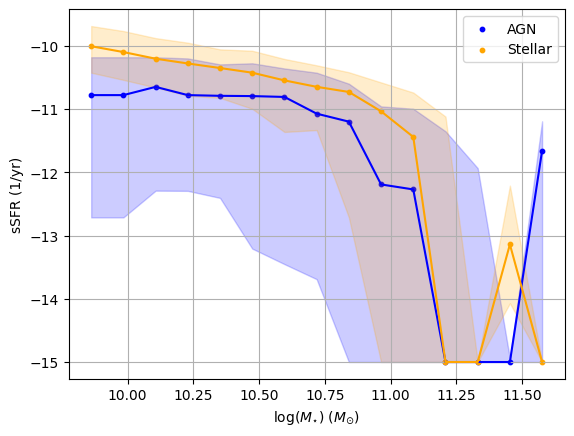

In [27]:
plt.plot(MASS_mean, bin_median_agn, color='blue')
plt.scatter(MASS_mean, bin_median_agn, color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean, percentile_25_agn, percentile_75_agn, color='blue', alpha=0.2)

plt.plot(MASS_mean, bin_median_s, color='orange')
plt.scatter(MASS_mean, bin_median_s, color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean, percentile_25_s, percentile_75_s, color='orange', alpha=0.2)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Observations:

this is not okay, because it doesn't show exactly if out two sets of data are separated

#### zoom

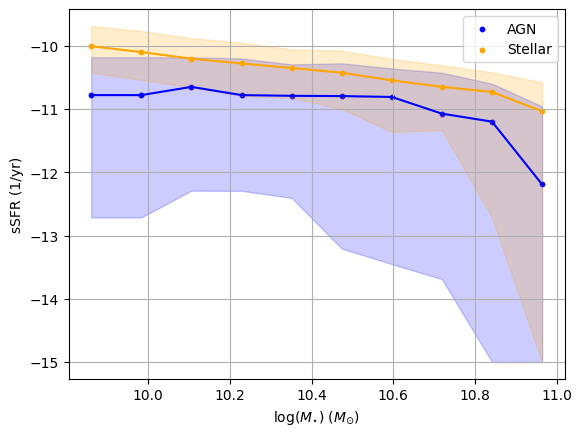

In [28]:
plt.plot(MASS_mean[0:10], bin_median_agn[0:10], color='blue')
plt.scatter(MASS_mean[0:10], bin_median_agn[0:10], color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean[0:10], percentile_25_agn[0:10], percentile_75_agn[0:10], color='blue', alpha=0.2)

plt.plot(MASS_mean[0:10], bin_median_s[0:10], color='orange')
plt.scatter(MASS_mean[0:10], bin_median_s[0:10], color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean[0:10], percentile_25_s[0:10], percentile_75_s[0:10], color='orange', alpha=0.2)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.grid()
plt.legend()
plt.show()

Observations:

what we wanted to point out is that galaxies with AGN have significantly lower sSFR than galaxies without AGN.
Our plot with means and standard deviations shows exactly this result, at least for masses up to 10^11 solar masses.

## Open box model

We decided to use the mean, now we add the model (at t=12)

We use a code: this code plots the evolution of sSFR vs stellar mass of galaxies born at different times => they have different evolutions

we plot 400 of these "galaxy types" from a birth age of 0.2 to 0.6 Gyr.

in the plot are shown points located at different times: we choose for each "galaxy type" in the model the point at t = 12 Gyr (which is the time at which our dataset galaxies are observed, since they are located at redshift = 0.something). 

then we plot these points in the sSFR vs stellar mass plot, connected by a line (red line)

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

# set global parameters
dt=0.01 # Gyr
eps=0.02
eta=1.0
R=0.1
f_b=0.15
M_h_min=1.e9
M_h_max=10.0**11.6
M_h_form=5.e8 # dm halo mass at t_form

# set global arrays
t=np.arange(dt,13.0,dt) # Gyr
z=t*0.
t_dyn=t*0.
for i in range(len(t)) :
    z[i]=z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i]=2.e7*(1+z[i])**(-0.75) # yr

def evolve_galaxy(t_form, t_obs, M_h_in):
    # initialize arrays
    M_h=t*0.
    M_g=t*0.
    M_s=t*0.
    SFR=t*0.
    i=0
    while i<len(t) :
        if t[i]<t_form :
            M_h[i]=M_h_in
        elif t[i]<t_obs:
            M_dot_h=42.0*((M_h[i-1]/1.e12)**1.127)*(1+1.17*z[i])*(0.3*(1+z[i])**3+0.7)**0.5 # M_sun/yr
            M_h[i]=M_h[i-1]+M_dot_h*dt*1.e9
            if M_h[i]<M_h_min:
                csi=0.0
            elif M_h[i]>M_h_min and M_h[i]<M_h_max:
                csi=1.0
            else:
                csi=0.0
                #csi=(M_h_max/M_h[i])
            M_g[i]=M_g[i-1]+dt*1.e9*(f_b*csi*M_dot_h-eps*(1+eta-R)*M_g[i-1]/t_dyn[i])
            SFR[i]=eps*M_g[i]/t_dyn[i]
            M_s[i]=M_s[i-1]+SFR[i]*dt*1.e9
        else:
            M_g[i]=M_g[i-1]
            M_s[i]=M_s[i-1]
            SFR[1]=SFR[1-1]
        i += 1
    return M_h, M_g, M_s, SFR

def plot_sSFR(M_s,SFR, col):
    t_mark=12.0
    M_s_= np.where(M_s>0,M_s,1.0)
    SFR_= np.where(SFR>0,SFR, 1.e-10)
    sSFR=SFR_/M_s_
    #plt.plot(np.log10(M_s_),np.log10(sSFR), color=col)
    #for tt in t_mark:
        #plt.plot(np.log10(M_s_[t==tt]),np.log10(sSFR[t==tt]),color=col, marker="o")
    #plt.scatter(np.log10(M_s_[t==t_mark]),np.log10(sSFR[t==t_mark]),color=col, marker='o', s=2)
    return np.log10(M_s_[t==t_mark])[0], np.log10(sSFR[t==t_mark])[0]

#t_form_plot=[0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.34,0.52,1.00]
t_form_plot=np.linspace(0.2,0.6,400)
col_plot=["black", "red", "brown", "orange", "green", "blue", "violet"]


In [30]:
x_model = np.zeros(len(t_form_plot))
y_model = np.zeros(len(t_form_plot))

# plot sSFR
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i],t_obs=13,M_h_in=M_h_form)
    x_model[i],y_model[i] = plot_sSFR(M_s, SFR, col='red')



[0.02510396 0.02619411 0.02883996 0.03244528 0.03735207 0.04616592
 0.06107758 0.08012676 0.1268556  0.19409528 0.27795533 0.39928316
 0.50367657 1.31556657 0.        ]


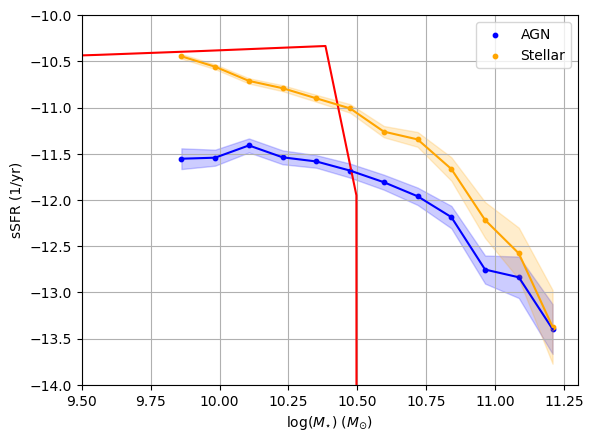

In [31]:
plt.plot(x_model, y_model, color='red')

plt.plot(MASS_mean[0:12], bin_means_agn[0:12], color='blue')
plt.scatter(MASS_mean[0:12], bin_means_agn[0:12], color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_agn[0:12]-stdmean_agn[0:12], bin_means_agn[0:12]+stdmean_agn[0:12], color='blue', alpha=0.2)

plt.plot(MASS_mean[0:12], bin_means_s[0:12], color='orange')
plt.scatter(MASS_mean[0:12], bin_means_s[0:12], color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_s[0:12]-stdmean_s[0:12], bin_means_s[0:12]+stdmean_s[0:12], color='orange', alpha=0.2)

print(stdmean_s)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.xlim(9.5,11.3)
plt.ylim(-14, -10)

plt.grid()
plt.legend()
plt.show()

Observations:

we just compare the open box model with the galaxies with NO AGN, because our model doesn't include AGN contributes.

the plot shows that before M = 10^10.5 solar masses, our dataset has a decreased trend with respect to the model (but this is a little difference) and after 10.5 the model is characterised by a strongly vertical decrease, which is not present in our dataset.

this could happen because the model tells us that galaxies at a certain point in time of their evolution have consumed all the gas needed to form new stars and the star formation process end up istantaneously (because all the gas disappear istantaneously). What happens in reality is that the gas is slowly consumed => which explains the slow decrease of our dataset after 10.5)

Now we compare the model with the median plot: we can say that in this case the model is even inside the error bars of our data in the first part of the plot

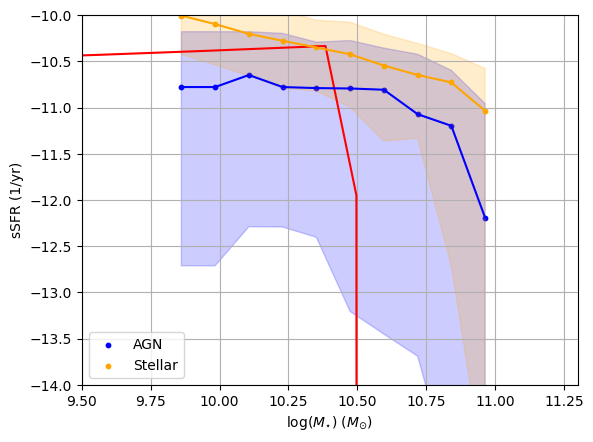

In [32]:
plt.plot(x_model, y_model, color='red')

plt.plot(MASS_mean[0:10], bin_median_agn[0:10], color='blue')
plt.scatter(MASS_mean[0:10], bin_median_agn[0:10], color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean[0:10], percentile_25_agn[0:10], percentile_75_agn[0:10], color='blue', alpha=0.2)

plt.plot(MASS_mean[0:10], bin_median_s[0:10], color='orange')
plt.scatter(MASS_mean[0:10], bin_median_s[0:10], color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean[0:10], percentile_25_s[0:10], percentile_75_s[0:10], color='orange', alpha=0.2)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.xlim(9.5,11.3)
plt.ylim(-14, -10)

plt.grid()
plt.legend()
plt.show()

We try to change the parameters: we want to modify a little bit our model in order to have a red line more similar to out data

#### Change $M_{max}$ da 11.6 a 13

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

# set global parameters
dt=0.01 # Gyr
eps=0.02    #0.02
eta=1      #1
R=0.1
f_b=0.15
M_h_min=1.e9
M_h_max=10.0**12
M_h_form=5.e8 # dm halo mass at t_form

# set global arrays
t=np.arange(dt,13.0,dt) # Gyr
z=t*0.
t_dyn=t*0.
for i in range(len(t)) :
    z[i]=z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i]=2.e7*(1+z[i])**(-0.75) # yr

def evolve_galaxy(t_form, t_obs, M_h_in):
    # initialize arrays
    M_h=t*0.
    M_g=t*0.
    M_s=t*0.
    SFR=t*0.
    i=0
    while i<len(t) :
        if t[i]<t_form :
            M_h[i]=M_h_in
        elif t[i]<t_obs:
            M_dot_h=42.0*((M_h[i-1]/1.e12)**1.127)*(1+1.17*z[i])*(0.3*(1+z[i])**3+0.7)**0.5 # M_sun/yr
            M_h[i]=M_h[i-1]+M_dot_h*dt*1.e9
            if M_h[i]<M_h_min:
                csi=0.0
            elif M_h[i]>M_h_min and M_h[i]<M_h_max:
                csi=1.0
            else:
                csi=0.0
                #csi=(M_h_max/M_h[i])
            M_g[i]=M_g[i-1]+dt*1.e9*(f_b*csi*M_dot_h-eps*(1+eta-R)*M_g[i-1]/t_dyn[i])
            SFR[i]=eps*M_g[i]/t_dyn[i]
            M_s[i]=M_s[i-1]+SFR[i]*dt*1.e9
        else:
            M_g[i]=M_g[i-1]
            M_s[i]=M_s[i-1]
            SFR[1]=SFR[1-1]
        i += 1
    return M_h, M_g, M_s, SFR

def plot_sSFR(M_s,SFR, col):
    t_mark=12.0
    M_s_= np.where(M_s>0,M_s,1.0)
    SFR_= np.where(SFR>0,SFR, 1.e-10)
    sSFR=SFR_/M_s_
    #plt.plot(np.log10(M_s_),np.log10(sSFR), color=col)
    #for tt in t_mark:
        #plt.plot(np.log10(M_s_[t==tt]),np.log10(sSFR[t==tt]),color=col, marker="o")
    #plt.scatter(np.log10(M_s_[t==t_mark]),np.log10(sSFR[t==t_mark]),color=col, marker='o', s=2)
    return np.log10(M_s_[t==t_mark])[0], np.log10(sSFR[t==t_mark])[0]

#t_form_plot=[0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.34,0.52,1.00]
t_form_plot=np.linspace(0.15,1,400)
col_plot=["black", "red", "brown", "orange", "green", "blue", "violet"]


[0.02510396 0.02619411 0.02883996 0.03244528 0.03735207 0.04616592
 0.06107758 0.08012676 0.1268556  0.19409528 0.27795533 0.39928316
 0.50367657 1.31556657 0.        ]


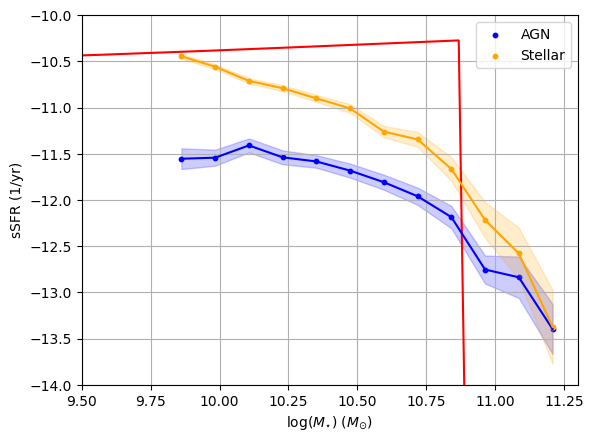

In [34]:
x_model = np.zeros(len(t_form_plot))
y_model = np.zeros(len(t_form_plot))

# plot sSFR
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i],t_obs=13,M_h_in=M_h_form)
    x_model[i],y_model[i] = plot_sSFR(M_s, SFR, col='red')

plt.plot(x_model, y_model, color='red')

plt.plot(MASS_mean[0:12], bin_means_agn[0:12], color='blue')
plt.scatter(MASS_mean[0:12], bin_means_agn[0:12], color='blue', label='AGN', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_agn[0:12]-stdmean_agn[0:12], bin_means_agn[0:12]+stdmean_agn[0:12], color='blue', alpha=0.2)

plt.plot(MASS_mean[0:12], bin_means_s[0:12], color='orange')
plt.scatter(MASS_mean[0:12], bin_means_s[0:12], color='orange', label='Stellar', s=10)
plt.fill_between(MASS_mean[0:12], bin_means_s[0:12]-stdmean_s[0:12], bin_means_s[0:12]+stdmean_s[0:12], color='orange', alpha=0.2)

print(stdmean_s)

plt.xlabel(r'log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.xlim(9.5,11.3)
plt.ylim(-14, -10)

plt.grid()
plt.legend()
plt.show()

Da fare
- cambiare m_max (entro 10^13) --> fatto
- cambiare limiti di t_form (abbassare limite inferior) --> non serviva per il valore di m_max sostituito
- calcolare z mean